In [9]:
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scaleogram as scg
from bsedata.bse import BSE

In [10]:
df=pd.read_csv("Data/NIFTY 50 - HistoricalPE_PBDIV_Data.csv")


In [12]:
# def freq(df,frequency):
#     return df.resample(frequency,on='Date').min()


# def analysis(df,col,frequency):
#     df=df.loc[0::,['Date',col]]
#     df['Date']=pd.to_datetime(df['Date'])
#     df=freq(df,frequency)
#     df=df.reset_index()
#     df['log_ratio']=np.log(df[col].shift(-1) / df[col])
#     df['pct_change']=df[col].pct_change()
#     plt.plot(df['Date'],df['pct_change'])
#     plt.show()
#     plt.hist(df['pct_change'],200)
#     plt.show()

df["Combined"]=df['P/E']*df["P/B"]/df["Div Yield %"]
df["Date"]=pd.to_datetime(df["Date"])
df

,Date,P/E,P/B,Div Yield %,Combined
0,2022-08-12,21.18,4.15,1.35,65.108889
1,2022-08-11,21.29,4.18,1.36,65.435441
2,2022-08-10,21.11,4.21,1.34,66.323209
3,2022-08-08,21.02,4.21,1.33,66.536992
4,2022-08-05,20.86,4.18,1.29,67.592868
...,...,...,...,...,...
5872,1999-01-07,12.46,2.22,1.71,16.176140
5873,1999-01-06,12.11,2.16,1.75,14.947200
5874,1999-01-05,11.84,2.11,1.79,13.956648
5875,1999-01-04,11.72,2.08,1.81,13.468287


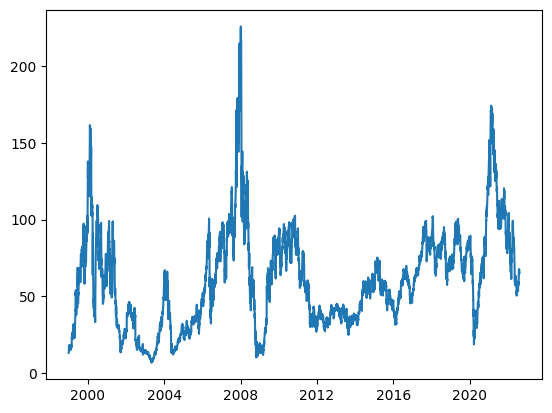

In [14]:
plt.plot(df["Date"],df["Combined"])

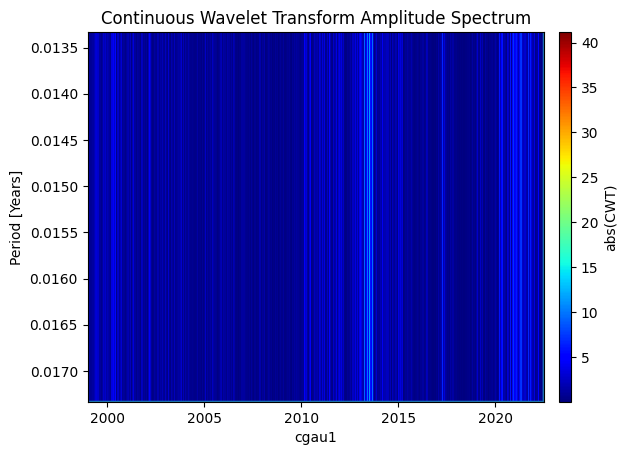

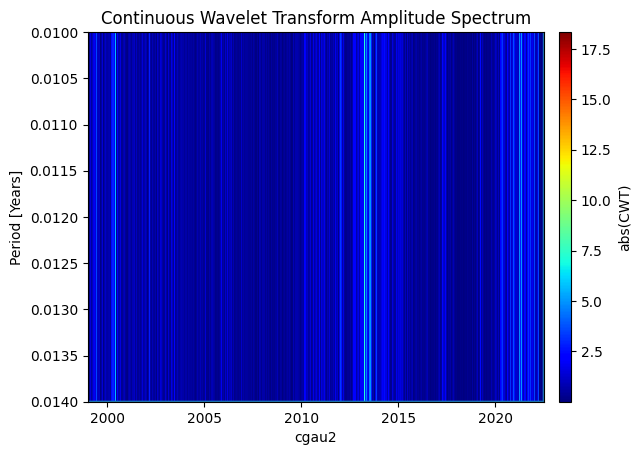

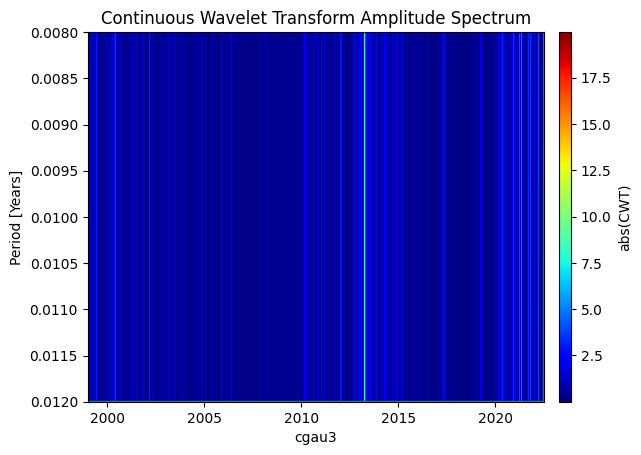

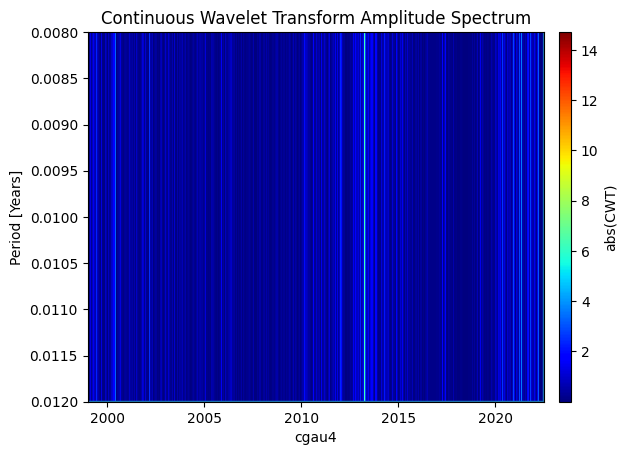

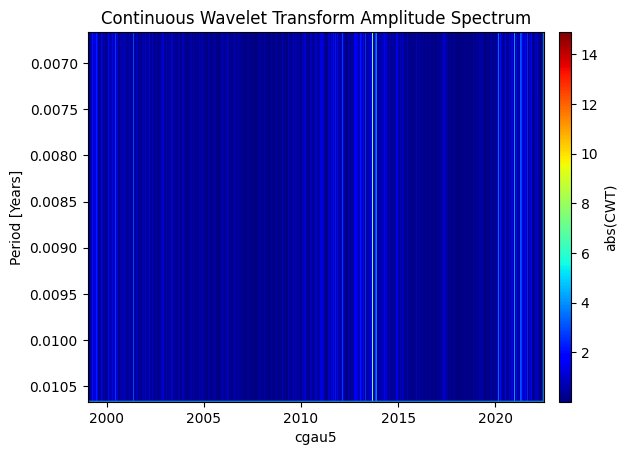

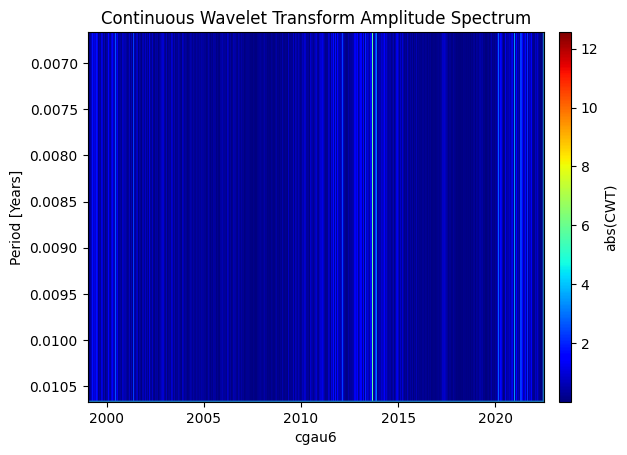

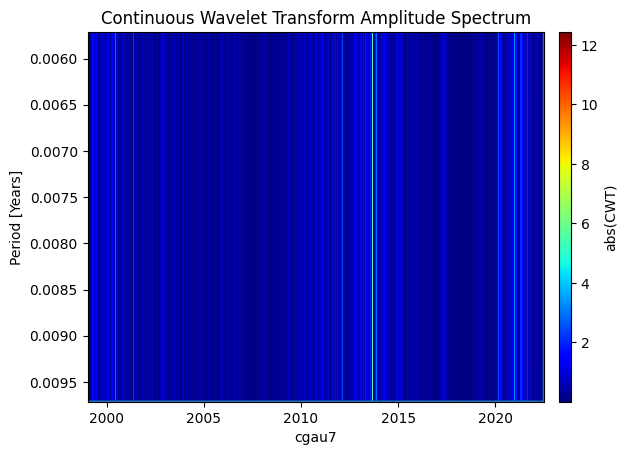

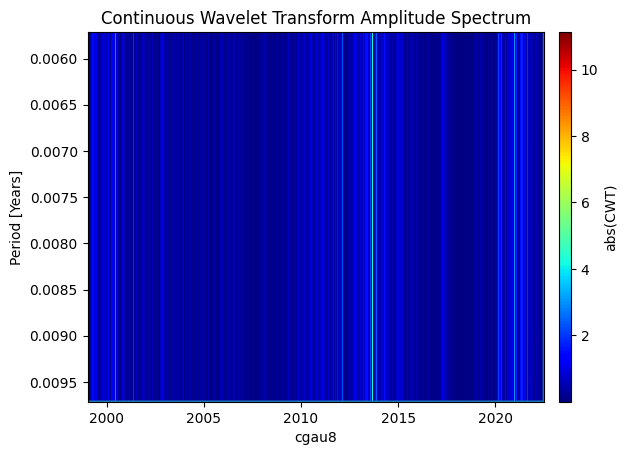

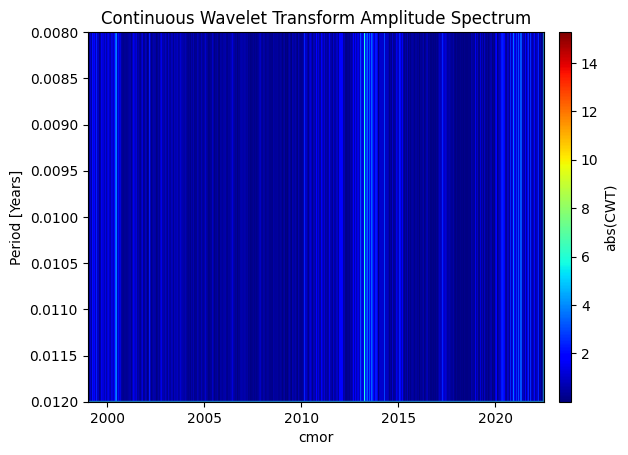

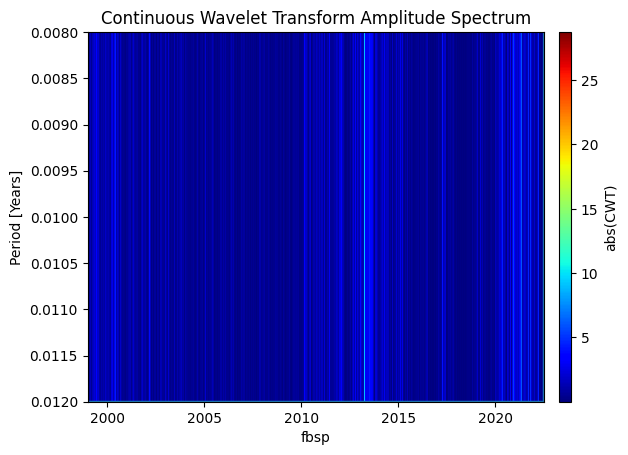

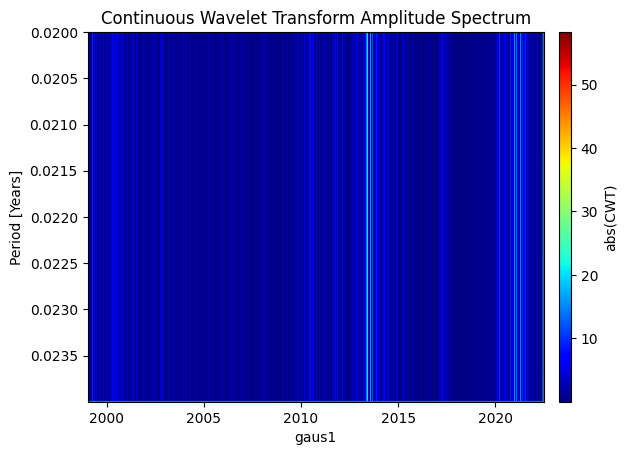

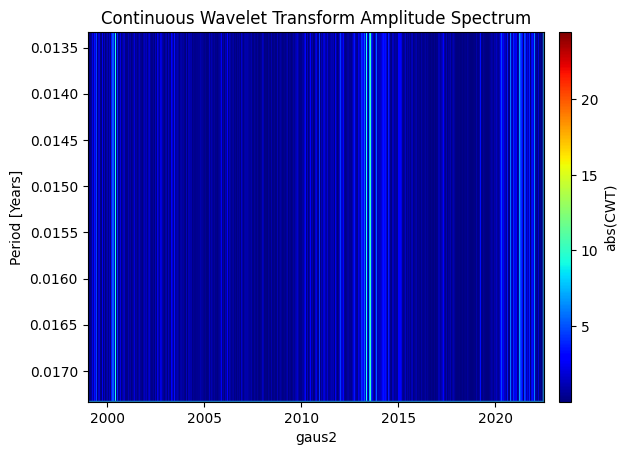

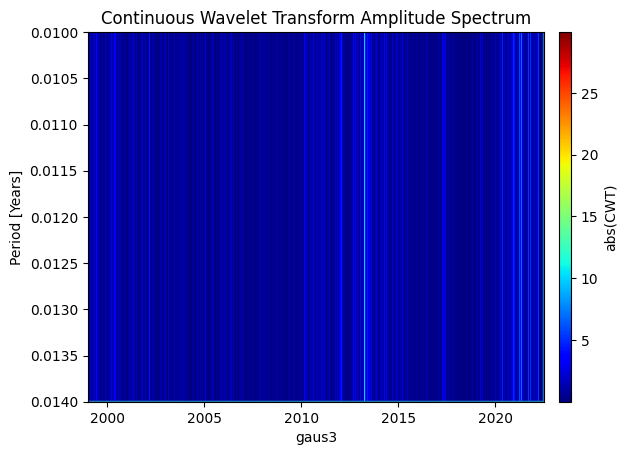

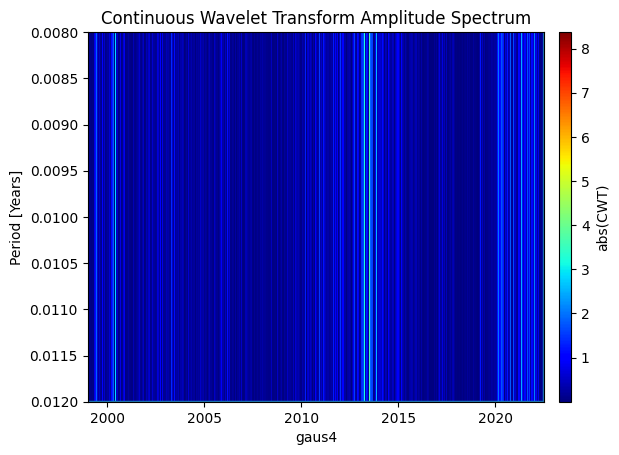

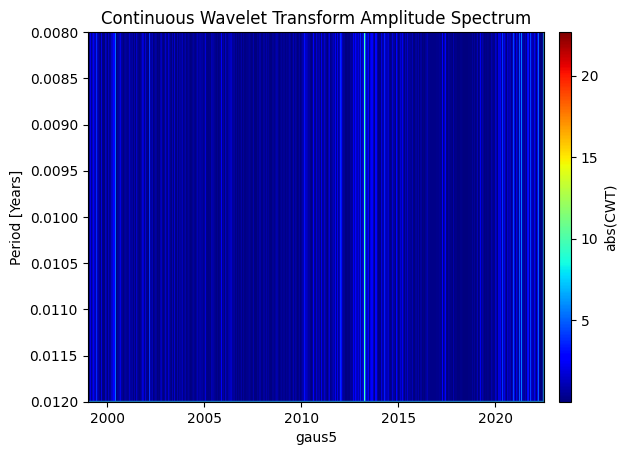

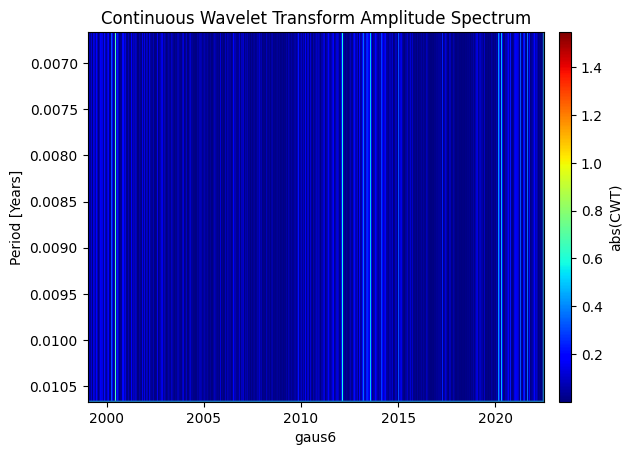

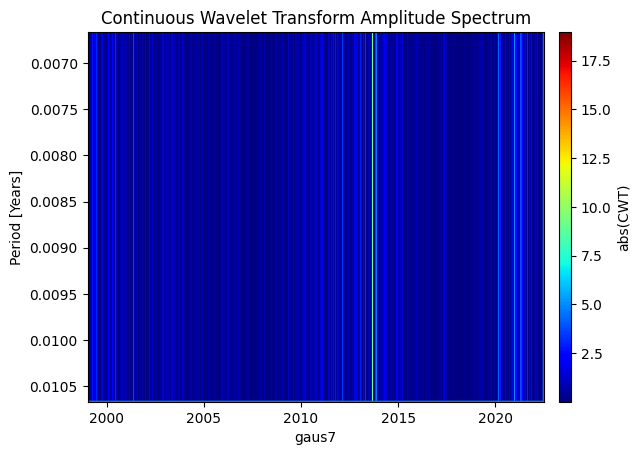

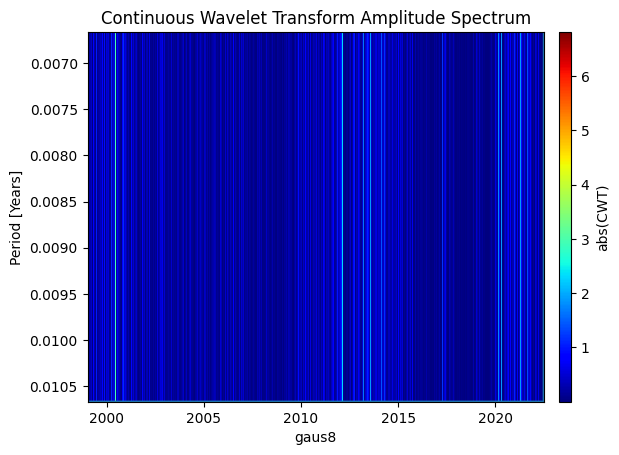

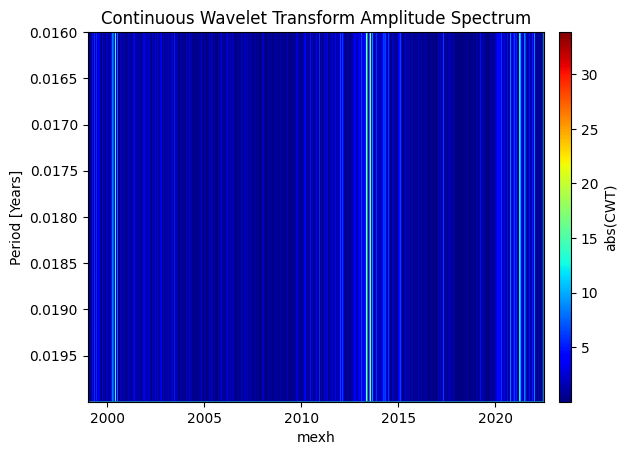

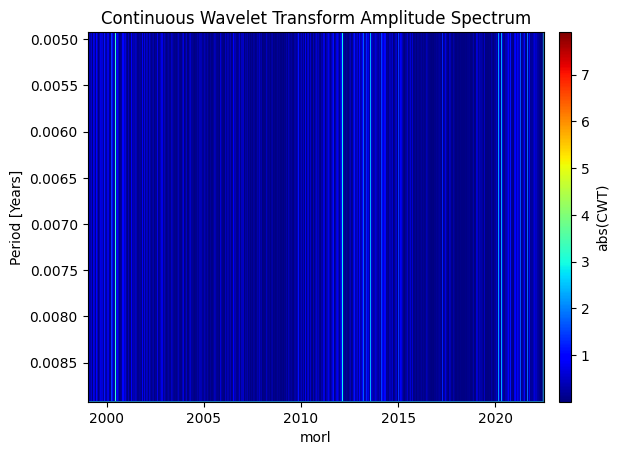

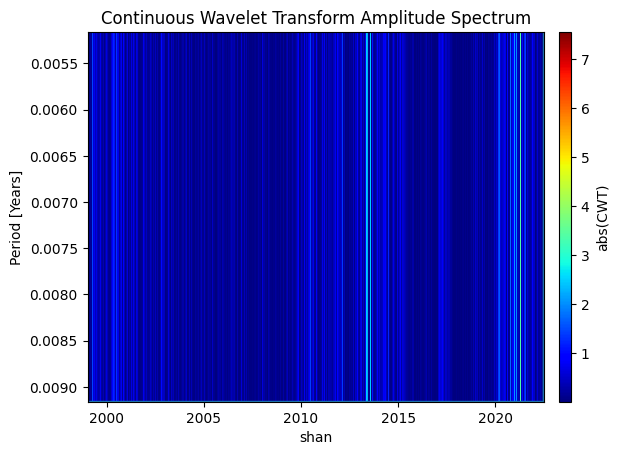

In [27]:

t0 = 1999; dt = 1/250
scales = np.arange(1,2)
year = t0 + np.arange(len(df))*dt


for wave in pywt.wavelist(kind='continuous'):
    scg.cws(year,df["Combined"],scales,cmap="jet", ylabel="Period [Years]", xlabel=wave,wavelet=wave)